# Task 2:
Decision Tree, Naïve Bayes, k-NN and Ensembles

# Obtendo o DataSet

bupa.**csv**

In [184]:
import itertools
import pydotplus
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.externals.six import StringIO
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# FAZENDO O DOWNLOAD DO DATASET
!pip install wget
!wget https://raw.githubusercontent.com/SamuelOliveira/FT084A/main/bupa_modified.csv --output-document=bupa_modified.csv

# IMPORTANDO O DATASET PARA O DATAFRAME
df = pd.read_csv('bupa_modified.csv', delimiter=';')

# PEGANDO OS NUMEROS DE ATRIBUTOS
count_col = df.shape[1]

# PEGANDO OS NÚMEROS DE AMOSTRAS
count_row = df.shape[0]

# INFORMAÇÕES DO DATAFRAME
df.info()
print('\n')

# LISTANDO DATAFRAME
print(df.head(-1))

print('\n')

print('Quantidade de campos(colunas): ', count_col)
print('Total de registros:', count_row)

--2021-04-15 07:10:13--  https://raw.githubusercontent.com/SamuelOliveira/FT084A/main/bupa_modified.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8379 (8.2K) [text/plain]
Saving to: ‘bupa_modified.csv’

bupa_modified.csv   100%[===================>]   8.18K  --.-KB/s    in 0s      

2021-04-15 07:10:13 (64.6 MB/s) - ‘bupa_modified.csv’ saved [8379/8379]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mcv       345 non-null    int64  
 1   alkphos   345 non-null    int64  
 2   sgpt      345 non-null    int64  
 3   sgot      345 non-null    int64  
 4   gammagt   345 non-null    int64  
 5   drinks    345 non-null 

# Tratando Dados Faltantes

Se Houver Dados Faltantes Remove (para evitar ruídos e distorções)

In [185]:
# REMOVENDO AMOSTRAS QUE CONTENHAM ATRIBUTOS COM VALORES (NAN) = Dados Faltantes
df = df.dropna()

# LISTANDO 10 PRIMEIRAS AMOSTRAS
print(df.head(-1))
print('\n')

print('Total de atributos:', df.shape[1])
print('Total de registros:', df.shape[0])
print('\n')

balanced_a = df[df['selector'] == 1].shape[0] * 100 / count_row
balanced_b = df[df['selector'] == 2].shape[0] * 100 / count_row

balanced_a_f = "{1:.2f}%".format("", balanced_a)
balanced_b_f = "{1:.2f}%".format("", balanced_b)

#VAMOS VERIFICAR SE O DATAFRAME ESTÁ BALANCEADO OU DESBALANCEADO
print("Total selector 1: %d %s" % (df[df['selector'] == 1].shape[0], balanced_a_f))
print("Total selector 2: %d %s" % (df[df['selector'] == 2].shape[0], balanced_b_f))

if (balanced_a >= 48.5 or balanced_a >= 51.5):
    print("Balanceada")
else:
    print("Desbalanceada")


     mcv  alkphos  sgpt  sgot  gammagt  drinks selector
0     85       92    45    27       31     0.0      '1'
1     85       64    59    32       23     0.0      '2'
2     86       54    33    16       54     0.0      '2'
3     91       78    34    24       36     0.0      '2'
4     87       70    12    28       10     0.0      '2'
..   ...      ...   ...   ...      ...     ...      ...
339   87       56    52    43       55    10.0      '2'
340   99       75    26    24       41    12.0      '1'
341   96       69    53    43      203    12.0      '2'
342   98       77    55    35       89    15.0      '1'
343   91       68    27    26       14    16.0      '1'

[344 rows x 7 columns]


Total de atributos: 7
Total de registros: 345


Total selector 1: 0 0.00%
Total selector 2: 0 0.00%
Desbalanceada


# Criando o Array Numpy
Convertendo o Dataframe para um Array Numpy, o tipo de dados usado no treinamento.

Também iremos separar o Dataset em dois. Um com as features de entrada, e outro com os labels (etiquetas, rótulos do registro).

Fazendo um Classificador para DataSet de Teste, e treinar o nosso modelo com a etiqueta presente no atributo **selector**

In [186]:
# VAMOS ARMAZENAS AS ETIQUETAS EM Y
Y = df['selector'].values 
print(Y)

nome_features = ['mcv','alkphos','sgpt','sgot','gammagt','drinks']

# X SERÁ A NOSSA MATRIZ COM AS FEATURES/ATRIBUTOS
# VAMOS PEGAR OS CAMPOS DE TREINAMENTO (mcv;alkphos;sgpt;sgot;gammagt;drinks)

X = df[nome_features].values

# VAMOS MOSTRAR X 
print(X)

["'1'" "'2'" "'2'" "'2'" "'2'" "'2'" "'1'" "'1'" "'1'" "'1'" "'1'" "'1'"
 "'1'" "'1'" "'1'" "'1'" "'1'" "'1'" "'1'" "'1'" "'1'" "'1'" "'1'" "'1'"
 "'1'" "'1'" "'1'" "'1'" "'1'" "'1'" "'1'" "'1'" "'1'" "'1'" "'1'" "'2'"
 "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'"
 "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'"
 "'2'" "'2'" "'2'" "'2'" "'1'" "'1'" "'2'" "'2'" "'2'" "'2'" "'1'" "'1'"
 "'1'" "'1'" "'1'" "'1'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'"
 "'2'" "'2'" "'2'" "'2'" "'1'" "'1'" "'1'" "'1'" "'1'" "'1'" "'1'" "'1'"
 "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'1'" "'1'" "'1'" "'1'" "'1'" "'1'"
 "'1'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'"
 "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'1'" "'1'"
 "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'1'" "'1'" "'1'" "'1'"
 "'1'" "'1'" "'1'" "'1'" "'1'" "'1'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'"
 "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'2'" "'

# Preparando Holdout
Dividindo o DataFrame em Dois:

*   70% dos dados (tr);
*   30% dos dados (ts).

In [187]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

# Normalizado o DataFrame

In [188]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Criando e Treinando os Modelos

*   Decision Tree;
*   Naïve Bayes;
*   k-NN.


In [189]:
decisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model_tree = decisionTree.fit(X_train, Y_train)

naive_bayes = GaussianNB()
model_naive = naive_bayes.fit(X_train, Y_train)

kNeighbors = KNeighborsClassifier(n_neighbors=30)
model_k_nn = kNeighbors.fit(X_train, Y_train)

# Decision Tree

Plotando a Decision Tree

[0.03043992 0.08829296 0.30031088 0.25271893 0.23600212 0.09223519]


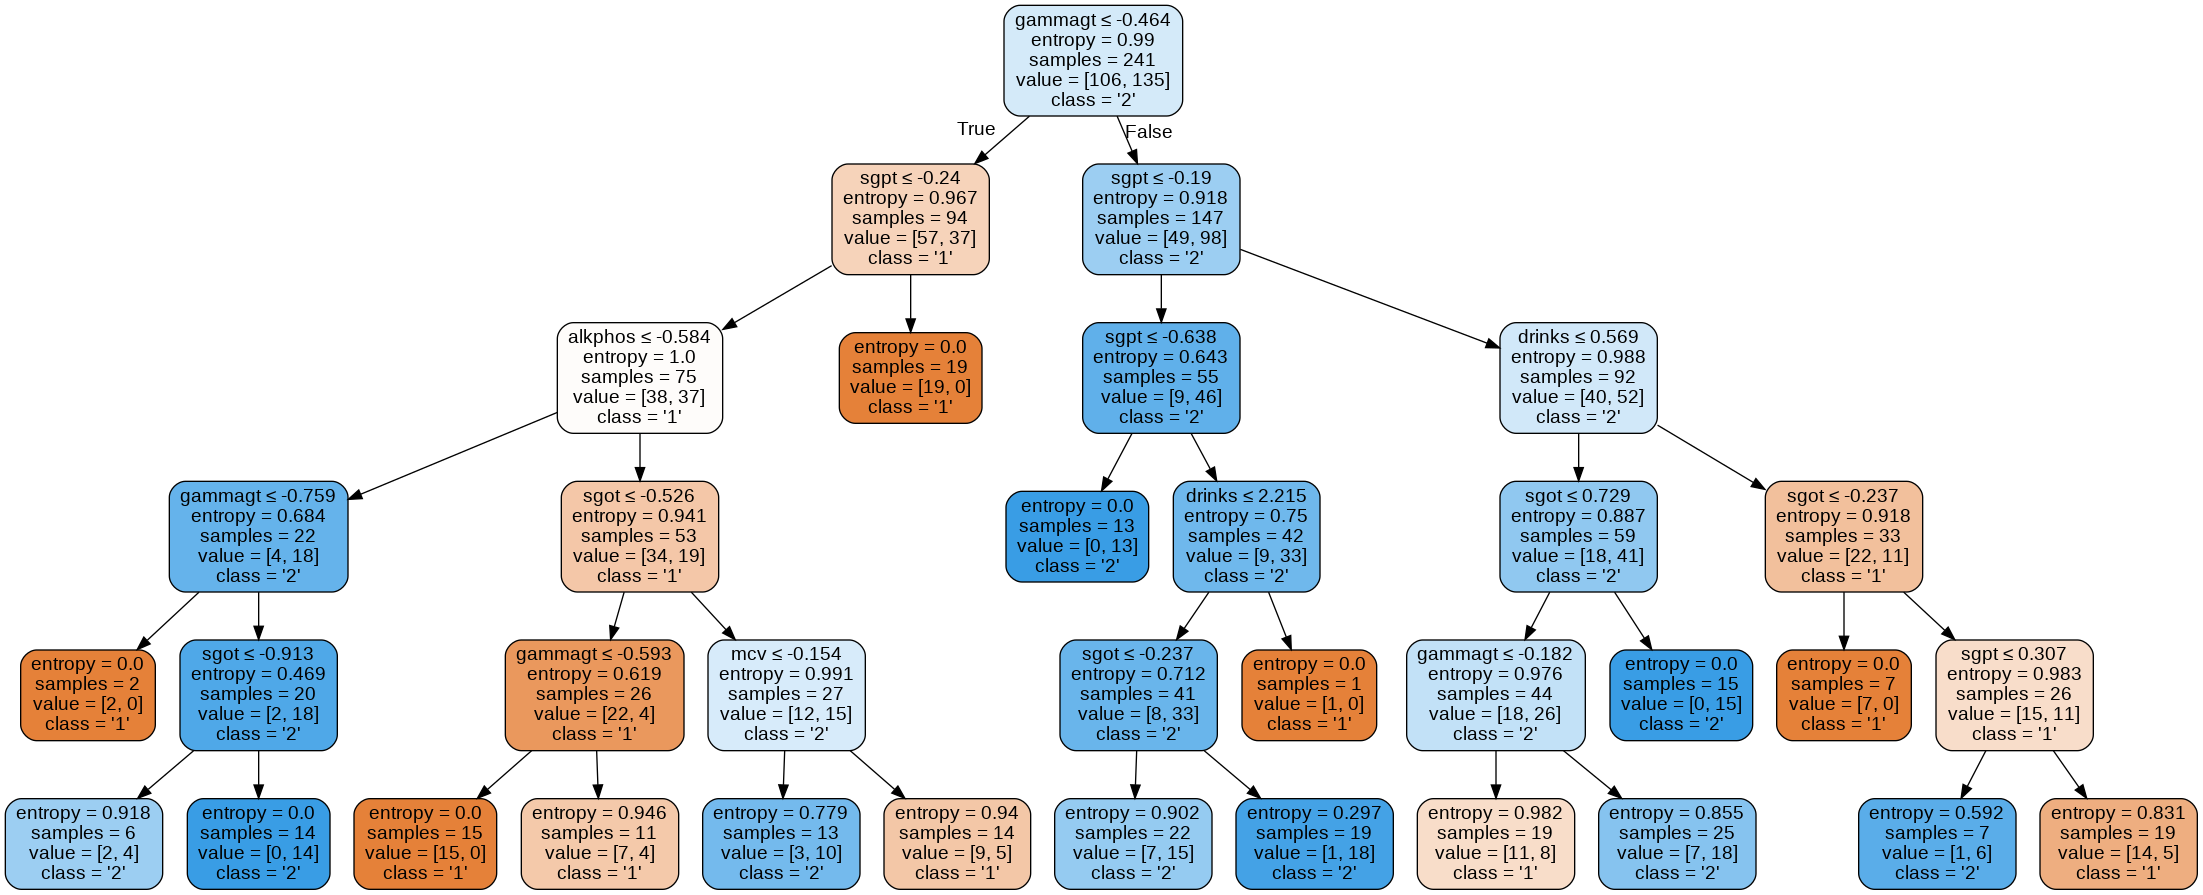

In [190]:
#PODEMOS MOSTRAR A FEATURE MAIS IMPORTANTE (WHITE BOX?)
print(model_tree.feature_importances_)

nome_classes = model_tree.classes_

# MONTAR A IMAGEM DA ÁRVORE
dot_data = StringIO()
export_graphviz(model_tree, out_file=dot_data, filled=True, feature_names=nome_features, class_names=nome_classes, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.write_png("model_tree.png")
Image('model_tree.png')

# Features/Atributos mais importantes(Decision Tree)

Features de maior importância para o modelo treinado

Feature ranking:
1. feature 2 (0.300311)
2. feature 3 (0.252719)
3. feature 4 (0.236002)
4. feature 5 (0.092235)
5. feature 1 (0.088293)
6. feature 0 (0.030440)


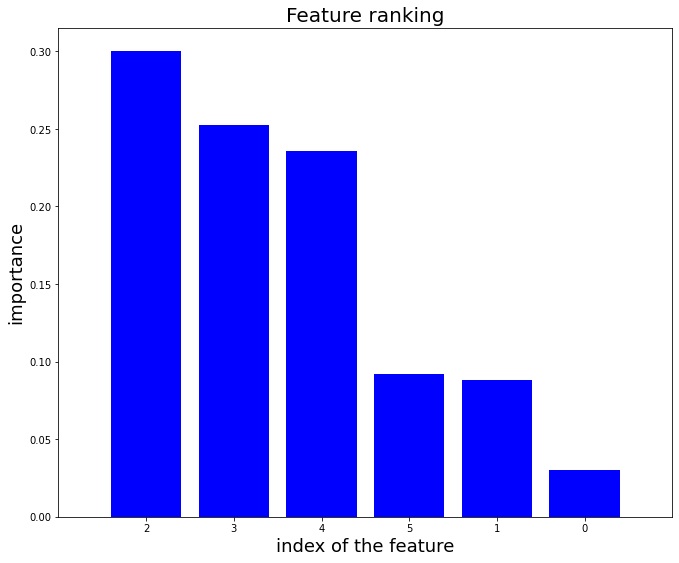

In [191]:
importances = model_tree.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(X.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)
plt.show()

# Testando Modelo(Decision Tree)

* Predições;
* Matriz de Confusão.

ACURÁCIA TREE:  63.46%


              precision    recall  f1-score   support

         '1'       0.51      0.54      0.53        39
         '2'       0.71      0.69      0.70        65

    accuracy                           0.63       104
   macro avg       0.61      0.62      0.61       104
weighted avg       0.64      0.63      0.64       104

Matriz de Confusão sem normalizacão 


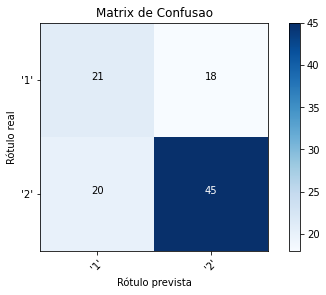

In [192]:
Y_predict = model_tree.predict(X_test)

print("ACURÁCIA TREE: ", "{1:.2f}%".format("", 100 * accuracy_score(Y_test, Y_predict)))
print('\n')
print(classification_report(Y_test, Y_predict))

# PRECISÃO: DAS CLASSIFICAÇÕES QUE O MODELO FEZ PARA UMA DETERMINADA CLASSE
# RECALL: DOS POSSÍVEIS DATAPOINTS PERTECENTES A UMA DETERMINADA CLASSE

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão sem normalizacão ')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo real')
    plt.xlabel('Rótulo prevista')

matrix_confusao = confusion_matrix(Y_test, Y_predict)
plt.figure()
plot_confusion_matrix(matrix_confusao, classes=nome_classes, title='Matrix de Confusao')

# Testando Modelo(Naïve Bayes)
* Predições;
* Matriz de Confusão.

ACURÁCIA NAIVE:  53.85%


              precision    recall  f1-score   support

         '1'       0.44      0.79      0.56        39
         '2'       0.76      0.38      0.51        65

    accuracy                           0.54       104
   macro avg       0.60      0.59      0.54       104
weighted avg       0.64      0.54      0.53       104

Matriz de Confusão sem normalizacão 


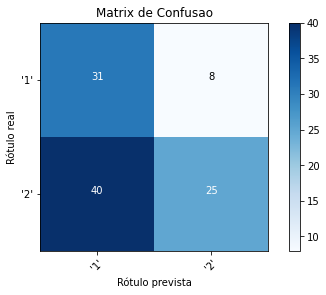

In [193]:
Y_predict = model_naive.predict(X_test)

print("ACURÁCIA NAIVE: ", "{1:.2f}%".format("", 100 * accuracy_score(Y_test, Y_predict)))
print('\n')
print(classification_report(Y_test, Y_predict))

# PRECISÃO: DAS CLASSIFICAÇÕES QUE O MODELO FEZ PARA UMA DETERMINADA CLASSE
# RECALL: DOS POSSÍVEIS DATAPOINTS PERTECENTES A UMA DETERMINADA CLASSE

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão sem normalizacão ')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo real')
    plt.xlabel('Rótulo prevista')

matrix_confusao = confusion_matrix(Y_test, Y_predict)
plt.figure()
plot_confusion_matrix(matrix_confusao, classes=nome_classes, title='Matrix de Confusao')

# Testando Modelo(k-NN)
* Predições;
* Matriz de Confusão.

ACURÁCIA k-NN:  67.31%


              precision    recall  f1-score   support

         '1'       0.57      0.51      0.54        39
         '2'       0.72      0.77      0.75        65

    accuracy                           0.67       104
   macro avg       0.65      0.64      0.64       104
weighted avg       0.67      0.67      0.67       104

Matriz de Confusão sem normalizacão 


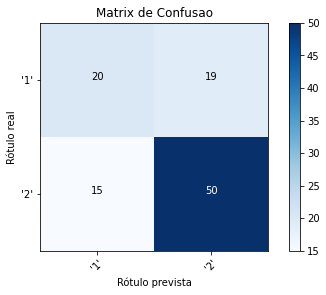

In [194]:
Y_predict = model_k_nn.predict(X_test)

print("ACURÁCIA k-NN: ", "{1:.2f}%".format("", 100 * accuracy_score(Y_test, Y_predict)))
print('\n')
print(classification_report(Y_test, Y_predict))

# PRECISÃO: DAS CLASSIFICAÇÕES QUE O MODELO FEZ PARA UMA DETERMINADA CLASSE
# RECALL: DOS POSSÍVEIS DATAPOINTS PERTECENTES A UMA DETERMINADA CLASSE

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão sem normalizacão ')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo real')
    plt.xlabel('Rótulo prevista')

matrix_confusao = confusion_matrix(Y_test, Y_predict)
plt.figure()
plot_confusion_matrix(matrix_confusao, classes=nome_classes, title='Matrix de Confusao')